# Chapter 13

# Compare Machine Learning Algorithms

## Compare Machine Learning Algorithms Consistently

LR: 0.770865 (0.050905)
LDA: 0.766969 (0.047966)
KNN: 0.710988 (0.050792)
CART: 0.704545 (0.043181)
NB: 0.759142 (0.038960)
SVM: 0.760458 (0.034712)


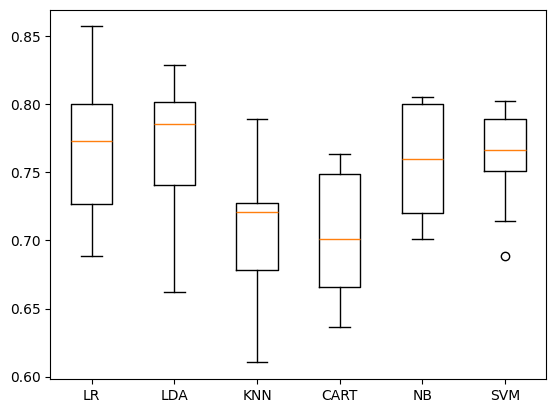

In [ ]:
from pandas import read_csv  # Thư viện để đọc dữ liệu từ file CSV
from sklearn.model_selection import KFold, cross_val_score  # Thư viện để tạo k-fold cross-validation và đánh giá mô hình
from sklearn.linear_model import LogisticRegression  # Thư viện để tạo mô hình hồi quy logistic
from sklearn.tree import DecisionTreeClassifier  # Thư viện để tạo mô hình cây quyết định
from sklearn.neighbors import KNeighborsClassifier  # Thư viện để tạo mô hình KNN
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis  # Thư viện để phân tích tuyến tính
from sklearn.naive_bayes import GaussianNB  # Thư viện để tạo mô hình Naive Bayes
from sklearn.svm import SVC  # Thư viện để tạo mô hình SVM
from matplotlib import pyplot as plt  # Thư viện để vẽ biểu đồ

# Đọc dữ liệu từ file CSV
filename = 'diabetes.csv'  # Tên file dữ liệu
data = read_csv(filename)  # Đọc dữ liệu

# Chuyển dữ liệu thành mảng numpy
array = data.values  # Chuyển đổi dữ liệu

# Tách dữ liệu thành đặc trưng đầu vào (X) và biến mục tiêu (Y)
X = array[:,0:8]  # 8 cột đầu tiên là đặc trưng đầu vào
Y = array[:,8]    # Cột cuối cùng là biến mục tiêu

# Định nghĩa các tham số cho cross-validation
num_folds = 10  # Số lượng tập gấp trong cross-validation
seed = 7        # Hạt giống ngẫu nhiên để đảm bảo tính tái lập

# Tạo danh sách các mô hình cần so sánh
models = []
models.append(('LR', LogisticRegression(solver='liblinear')))  # Hồi quy logistic
models.append(('LDA', LinearDiscriminantAnalysis()))  # Phân tích tuyến tính
models.append(('KNN', KNeighborsClassifier()))  # KNN
models.append(('CART', DecisionTreeClassifier()))  # Cây quyết định
models.append(('NB', GaussianNB()))  # Naive Bayes
models.append(('SVM', SVC()))  # SVM

# Biến lưu trữ kết quả và tên mô hình
results = []
names = []
scoring = 'accuracy'  # Định nghĩa tiêu chí đánh giá

# Lặp qua từng mô hình để đánh giá
for name, model in models:
    kfold = KFold(n_splits=num_folds, random_state=seed, shuffle=True)  # Tạo k-fold
    result = cross_val_score(model, X, Y, cv=kfold, scoring=scoring)  # Đánh giá mô hình
    results.append(result)  # Lưu kết quả
    names.append(name)  # Lưu tên mô hình
    msg = "%s: %f (%f)" % (name, result.mean(), result.std())  # Tạo thông báo kết quả
    print(msg)  # In kết quả

# Vẽ biểu đồ so sánh
fig = plt.figure()  # Tạo biểu đồ
ax = fig.add_subplot(111)  # Thêm subplot
plt.boxplot(results)  # Vẽ boxplot
ax.set_xticklabels(names)  # Đặt nhãn trục X
plt.show()  # Hiển thị biểu đồ